### Illustrate how to create and simulate a population within an environment

_Imagine a mouse sniffing around in a room looking for cheese. This is the computational version of that experiment._

The "mouse" in this simulation is modified neural networks with three types of neurons:
- Motor Neurons
- Sensory Neurons (olfactory) 
- Intern Neurons (e.g. the brain)

The mouse network is simulated in time, that is evolving the neural network based on simple principles in neuroscience.

One of the motivations for creating these simulations is to first determine what configurations of those better mice perform better than others, and then evaluate these configurations. For more information see

This is a basic illustration of the functionality of the SensorMover using a random mouse. 

In [1]:
%matplotlib inline
import pyBrainNetSim.models.world as world
import pyBrainNetSim.models.individuals as ind
import pyBrainNetSim.generators.random as random
import pyBrainNetSim.simulation.simnetwork as sim

The first step is to create an environment for our Individual to move around in.

In [2]:
my_environment = world.Environment(origin=(-10, -10), max_point=(10, 10), field_permeability=1.)

The environment spans in a rectangular coordinate system from ``(-10, -10)`` to ``(10, 10)`` and has a ``field_permeability=1`` which describes how the attractor (i.e. a piece of food that smells) field can penetrate into the environment (higher the more penetration).

Next add an attractor. This attractor emits a smell that can be sensed by our Individual. Plotted is the smell field.

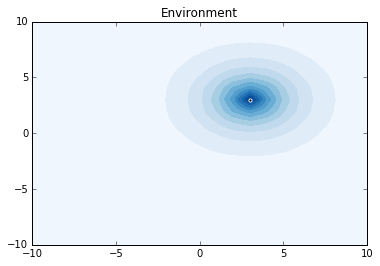

In [3]:
food = world.Attractor(environment=my_environment, position=(3, 3), strength=10.)  # add "food"
ax1 = my_environment.plot_attractor_field(upsample_factor=20)  # View the smell field

Next the mouse is added into the environment. Think of an individual as a primitive mouse in which it is driven by an internal neural network, where some of the neurons in this network sense (olfactory), others are "motor units" that move the mouse, and there are internal neurons (i.e. the brain) that do the processing.

Other than having the ability to move and smell above, below, left and right of it, there isn't a fixed configuration these neurons. Furthermore there are a near innumerable number of configurations this can take. This is the reason for the ``SensorMoverPropertyDistribution()`` object. Each property of within the individual can be distributed (like gaussian or a poisson distributions) or a fixed number. Details are TBD. One of the featurs of this ``SensorMoverPropertyDistribution()`` object is that it can create a random sample of an individual. This is done below, with the default values.

The temporal dynamics of this network are governed by the ``HebbianNetworkBasic()`` class, which simulate in time handling the presynaptic firing, signal integration, and post-synaptic propigation at each point in time.


In [7]:
sm_prop_dist = random.SensorMoverPropertyDistribution()  # default set of distributions of the different variables in the mouse
my_network = sim.HebbianNetworkBasic(sm_prop_dist.create_digraph())  # create_digraph method to creates a bi-directional network

Now the Individual, a ``SensorMover()`` object, is placed within the environment. This will be initially placed at ``position=(-2,-2)``.

In [5]:
sm1 = ind.SensorMover(environment=my_environment, initial_network=my_network, position=(-2, -2))

Next, simulate the ``SensorMover`` forward in time 5 timesteps. Each step evaluates sensory signals from the attractor, internally evaluating presynaptic firing, signal integration, and post-synaptic propigation, and then producing a motor output. This is ev

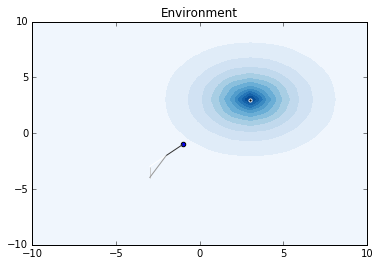

In [6]:
sm1.sim_time_steps(max_iter=5)
ax1 = my_environment.plot_individual_trajectory(upsample_factor=20)